In [43]:
#### Jupyter Basic Setting ####
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns  # 시각화
import warnings; warnings.filterwarnings('ignore')  # 경고 무시
import sys,os 
import xgboost as xgb
xgb.set_config(verbosity=0)# xgb 경고 끔
pd.set_option('display.float_format', lambda x: '%.3f' % x) ##scientific 수치
parent_dir = os.path.dirname(os.getcwd())
parent_dir = os.path.dirname(parent_dir)
sys.path.append(parent_dir)
from Module.Functions import Service
# 기본 세팅
Service.plotSetting("seaborn-v0_8")


___ 🟡 PLOTSETTING. 
______ 📌 matplotlibn plot 한글화 Setting
___## OS platform 한글 세팅완료 ## ___


In [2]:
data_Folder='../../Data/승하차정제'
finalT =pd.read_csv(os.path.join(data_Folder,'finalTable_18to24.csv'))

In [3]:
test=finalT

In [4]:
test.head()

Unnamed: 0.1  Unnamed: 0  역사코드  역이름  호선        수송일자 승하차구분  05시인원  06시인원  \
0             0           0   150  서울역   8  2023-11-01    승차    342    520   
1             1           1   150  서울역   8  2023-11-01    하차    300   2166   
2             2           2   150  서울역   8  2023-11-02    승차    369    562   
3             3           3   150  서울역   8  2023-11-02    하차    361   2284   
4             4           4   150  서울역   8  2023-11-03    승차    340    513   

   07시인원  ...   15배차   16배차   17배차   18배차   19배차   20배차   21배차   22배차  23배차  \
0   1929  ... 15.000 15.500 17.000 16.000 15.500 14.500 14.000 11.000 9.000   
1   5186  ... 15.000 15.500 17.000 16.000 15.500 14.500 14.000 11.000 9.000   
2   1859  ... 15.000 15.500 17.000 16.000 15.500 14.500 14.000 11.000 9.000   
3   5117  ... 15.000 15.500 17.000 16.000 15.500 14.500 14.000 11.000 9.000   
4   1681  ... 15.000 15.500 17.000 16.000 15.500 14.500 14.000 11.000 9.000   

   24배차  
0 1.000  
1 1.000  
2 1.000  
3 1.000  
4 1.000  

[5 rows x 53 columns]

In [5]:
test.describe()
Service.dataInfoProcessing(test,replace_Nan=True)
# test.to_csv(os.path.join(data_Folder,'finalTable_18to24.csv'))

___ 🟡 DATAINFOPROCESSING. 
______ 📌 Data frame 의 정제해야할 부분을 체크해주는 함수 입니다
  1️⃣ Data row/colum numbers : 1426854/53
  2️⃣ null check 결과Null 없는 clean data!
  3️⃣ Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[Unnamed: 0.1(int64)]: 		1426854/1426854 [uniq/raw]
	1.[Unnamed: 0(int64)]: 		1426854/1426854 [uniq/raw]
	2.[역사코드(int64)]: 			100/1426854 [uniq/raw]
	3.[역이름(object)]: 			98/1426854 [uniq/raw]
	4.[호선(int64)]: 			1/1426854 [uniq/raw]
	5.[수송일자(object)]: 			2222/1426854 [uniq/raw]
	 ...etc (추가로 47개의 칼럼이 있습니다 )


Unnamed: 0.1  Unnamed: 0  역사코드       역이름  호선        수송일자 승하차구분  \
0                   0           0   150       서울역   8  2023-11-01    승차   
1                   1           1   150       서울역   8  2023-11-01    하차   
2                   2           2   150       서울역   8  2023-11-02    승차   
3                   3           3   150       서울역   8  2023-11-02    하차   
4                   4           4   150       서울역   8  2023-11-03    승차   
...               ...         ...   ...       ...  ..         ...   ...   
1426849       1426849     1426849   414  수유(강북구청)   8  2019-12-23    승차   
1426850       1426850     1426850   414  수유(강북구청)   8  2019-12-23    하차   
1426851       1426851     1426851   414  수유(강북구청)   8  2019-12-24    승차   
1426852       1426852     1426852   414  수유(강북구청)   8  2019-12-24    하차   
1426853       1426853     1426853   414  수유(강북구청)   8  2019-12-25    승차   

         05시인원  06시인원  07시인원  ...   15배차   16배차   17배차   18배차   19배차   20배차  \
0          342    520   1929  ... 15.000 15.500 17.000 16.000 15.500 14.500   
1          300   2166   5186  ... 15.000 15.500 17.000 16.000 15.500 14.500   
2          369    562   1859  ... 15.000 15.500 17.000 16.000 15.500 14.500   
3          361   2284   5117  ... 15.000 15.500 17.000 16.000 15.500 14.500   
4          340    513   1681  ... 15.000 15.500 17.000 16.000 15.500 14.500   
...        ...    ...    ...  ...    ...    ...    ...    ...    ...    ...   
1426849    850   1783   5431  ... 21.000 23.000 28.000 33.500 32.000 27.500   
1426850    165    472    827  ... 21.000 23.000 28.000 33.500 32.000 27.500   
1426851    746   1705   5173  ... 21.000 23.000 28.000 33.500 32.000 27.500   
1426852    174    425    845  ... 21.000 23.000 28.000 33.500 32.000 27.500   
1426853    449    679   1000  ... 21.000 23.000 28.000 33.500 32.000 27.500   

          21배차   22배차  23배차  24배차  
0       14.000 11.000 9.000 1.000  
1       14.000 11.000 9.000 1.000  
2       14.000 11.000 9.000 1.000  
3       14.000 11.000 9.000 1.000  
4       14.000 11.000 9.000 1.000  
...        ...    ...   ...   ...  
1426849 23.000 14.000 9.000 0.000  
1426850 23.000 14.000 9.000 0.000  
1426851 23.000 14.000 9.000 0.000  
1426852 23.000 14.000 9.000 0.000  
1426853 23.000 14.000 9.000 0.000  

[1426854 rows x 53 columns]

### 데이터 분석
> 

In [6]:
test_2024=test[test['년도']==2024]

In [7]:
test_st=test_2024[['역사코드', '역이름', '호선', '수송일자', '승하차구분', '05시인원', '06시인원', '07시인원',
       '08시인원', '09시인원', '10시인원', '11시인원', '12시인원', '13시인원', '14시인원', '15시인원',
       '16시인원', '17시인원', '18시인원', '19시인원', '20시인원', '21시인원', '22시인원', '23시인원',
       '24시인원', '요일', '주중주말', '년도', '월', '주차', '공휴일']]

In [8]:
test_2024.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '역사코드', '역이름', '호선', '수송일자', '승하차구분',
       '05시인원', '06시인원', '07시인원', '08시인원', '09시인원', '10시인원', '11시인원', '12시인원',
       '13시인원', '14시인원', '15시인원', '16시인원', '17시인원', '18시인원', '19시인원', '20시인원',
       '21시인원', '22시인원', '23시인원', '24시인원', '요일', '주중주말', '년도', '월', '주차',
       '공휴일', '05배차', '06배차', '07배차', '08배차', '09배차', '10배차', '11배차', '12배차',
       '13배차', '14배차', '15배차', '16배차', '17배차', '18배차', '19배차', '20배차', '21배차',
       '22배차', '23배차', '24배차'],
      dtype='object')

---
### 회귀 모델 만들기
- input 과 output 을 나눈다

---
### Test, trainning 나누기 

In [9]:
def linearRegression_test(data):
    # linear regression 을 위해 수치화할수있는것만 남긴다. 
    test_2024_승차 =data[data['승하차구분']=='승차']
    test_2024_하차 =data[data['승하차구분']=='하차']
    X= test_2024_승차[['역사코드', '호선','요일', '년도', '월', '주차', '공휴일','05배차', '06배차', '07배차',
        '08배차', '09배차', '10배차', '11배차', '12배차', '13배차', '14배차', '15배차', '16배차',
        '17배차', '18배차', '19배차', '20배차', '21배차', '22배차', '23배차', '24배차']]
    y =test_2024_승차[['05시인원', '06시인원', '07시인원',
        '08시인원', '09시인원', '10시인원', '11시인원', '12시인원', '13시인원', '14시인원', '15시인원',
        '16시인원', '17시인원', '18시인원', '19시인원', '20시인원', '21시인원', '22시인원', '23시인원',
        '24시인원']]
    ## 승하차구분, 주중주말 삭제 

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=2)
    lin_reg = LinearRegression()
    # lin_reg.fit(X_train,y_train.iloc[:,1])
    lin_reg.fit(X_train,y_train)
    y_pred = lin_reg.predict(X_test)
    
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse :0.2f}")
    return y_pred

# test_2024=test[test['년도']==2022]
# test_2024=test[test['년도']==2024]
linearRegression_test(test)

RMSE: 1061.78


array([[ 385.42672201,  764.02537425, 1974.93384501, ..., 1888.41240419,
         796.0848124 ,  150.06357689],
       [ -59.08659256,  -23.43553596,  -69.1348522 , ..., 1189.35208545,
         565.97588868,  147.07014727],
       [ 727.29533024, 1084.42474134, 2855.75957899, ..., 1187.19942816,
         550.03637102,  169.23214242],
       ...,
       [ 350.24862266,  585.45101543, 1447.29497124, ..., 1141.40123788,
         520.24210482,  116.85751816],
       [ 294.2512439 ,  234.30557198,  527.06158132, ..., 1297.33843038,
         599.86793068,   86.71848786],
       [ 536.16126131,  743.41142737, 1954.17698843, ..., 1942.58699697,
        1031.77012177,  227.36864346]])

---
### Linear Regression

In [10]:
# linear regression 을 위해 수치화할수있는것만 남긴다. 
test_승차 =test[test['승하차구분']=='승차']
test_하차 =test[test['승하차구분']=='하차']
X= test_승차[['역사코드', '호선','요일', '년도', '월', '주차', '공휴일','05배차', '06배차', '07배차',
    '08배차', '09배차', '10배차', '11배차', '12배차', '13배차', '14배차', '15배차', '16배차',
    '17배차', '18배차', '19배차', '20배차', '21배차', '22배차', '23배차', '24배차']]
y =test_승차[['05시인원', '06시인원', '07시인원',
    '08시인원', '09시인원', '10시인원', '11시인원', '12시인원', '13시인원', '14시인원', '15시인원',
    '16시인원', '17시인원', '18시인원', '19시인원', '20시인원', '21시인원', '22시인원', '23시인원',
    '24시인원']]
## 승하차구분, 주중주말 삭제 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=2)
lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train.iloc[:,1])
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse :0.2f}")

RMSE: 1061.78


In [11]:
test.tail(3)

Unnamed: 0.1  Unnamed: 0  역사코드       역이름  호선        수송일자 승하차구분  \
1426851       1426851     1426851   414  수유(강북구청)   8  2019-12-24    승차   
1426852       1426852     1426852   414  수유(강북구청)   8  2019-12-24    하차   
1426853       1426853     1426853   414  수유(강북구청)   8  2019-12-25    승차   

         05시인원  06시인원  07시인원  ...   15배차   16배차   17배차   18배차   19배차   20배차  \
1426851    746   1705   5173  ... 21.000 23.000 28.000 33.500 32.000 27.500   
1426852    174    425    845  ... 21.000 23.000 28.000 33.500 32.000 27.500   
1426853    449    679   1000  ... 21.000 23.000 28.000 33.500 32.000 27.500   

          21배차   22배차  23배차  24배차  
1426851 23.000 14.000 9.000 0.000  
1426852 23.000 14.000 9.000 0.000  
1426853 23.000 14.000 9.000 0.000  

[3 rows x 53 columns]

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse :0.2f}")

RMSE: 1061.78


---
### RMSE 871 값은  좋은값인가?

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
test_승차['09시인원'].describe()

count   713429.000
mean      1114.323
std       1129.746
min          0.000
25%        388.000
50%        748.000
75%       1392.000
max       9797.000
Name: 09시인원, dtype: float64

---
### xGBoost model regression

In [14]:
from xgboost import XGBRegressor
xg_reg  = XGBRegressor()
xg_reg.fit(X_train,y_train)
y_pred  = xg_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse :0.2f}")


RMSE: 195.71


In [15]:
y_pred  = xg_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse :0.2f}")

RMSE: 195.71


---
### Cross Validation
K-fold 교차검증
- 선형회귀 교차 검증
 * neg mean squared error : 사이킷런은 모델을 훈련할때 높은 점수가 좋은것으로 간주함. 정확도는 이에 맞으나 오차는 이와반대로 낮을수록 좋음. 평균 제곱 오차에 음수를 취하면 가장 높은 값이됨. 



In [16]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=10)
rmse = np.sqrt(-scores)
print("회귀 rmse: ", np.round(rmse,2))
print(f'RMSE 평균 {rmse.mean():0.2f}')

회귀 rmse:  [1934.94 1347.5  1648.55 1768.48 1480.26  529.93  895.73  993.82 1372.1
 1650.77]
RMSE 평균 1362.21


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

model = MultiOutputRegressor(XGBRegressor())
# scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
scores = cross_validate(model, X,y,return_train_score=True,scoring='neg_mean_squared_error', cv=5,n_jobs=-1)

# 스코어를 양수로 변환하고, 각 출력 변수에 대해 루트 평균 제곱 오차(RMSE)를 계산
rmse = np.sqrt(-scores)

print("XGBoost 회귀 RMSE: ", np.round(rmse, 2))
print(f'RMSE 평균: {rmse.mean():0.2f}')

KeyboardInterrupt: 

---
### Decision Tree 

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

reg = DecisionTreeRegressor(random_state=2)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
# accuracy_score(y_pred,y_test)

scores = cross_val_score(reg,X,y,scoring='neg_mean_squared_error',cv=5)
# 성능 평가
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(-scores)
print(Service.colored_text(f'score : {scores}','red'))
# print("R2 score: ",r2.mean())
print("RMSE  평균:",rmse.mean())

score : [-4122264.40105862 -4513107.40940141 -3872435.61411    -1313873.28962092
 -2095640.27130532]
RMSE  평균: 1743.2939688580482


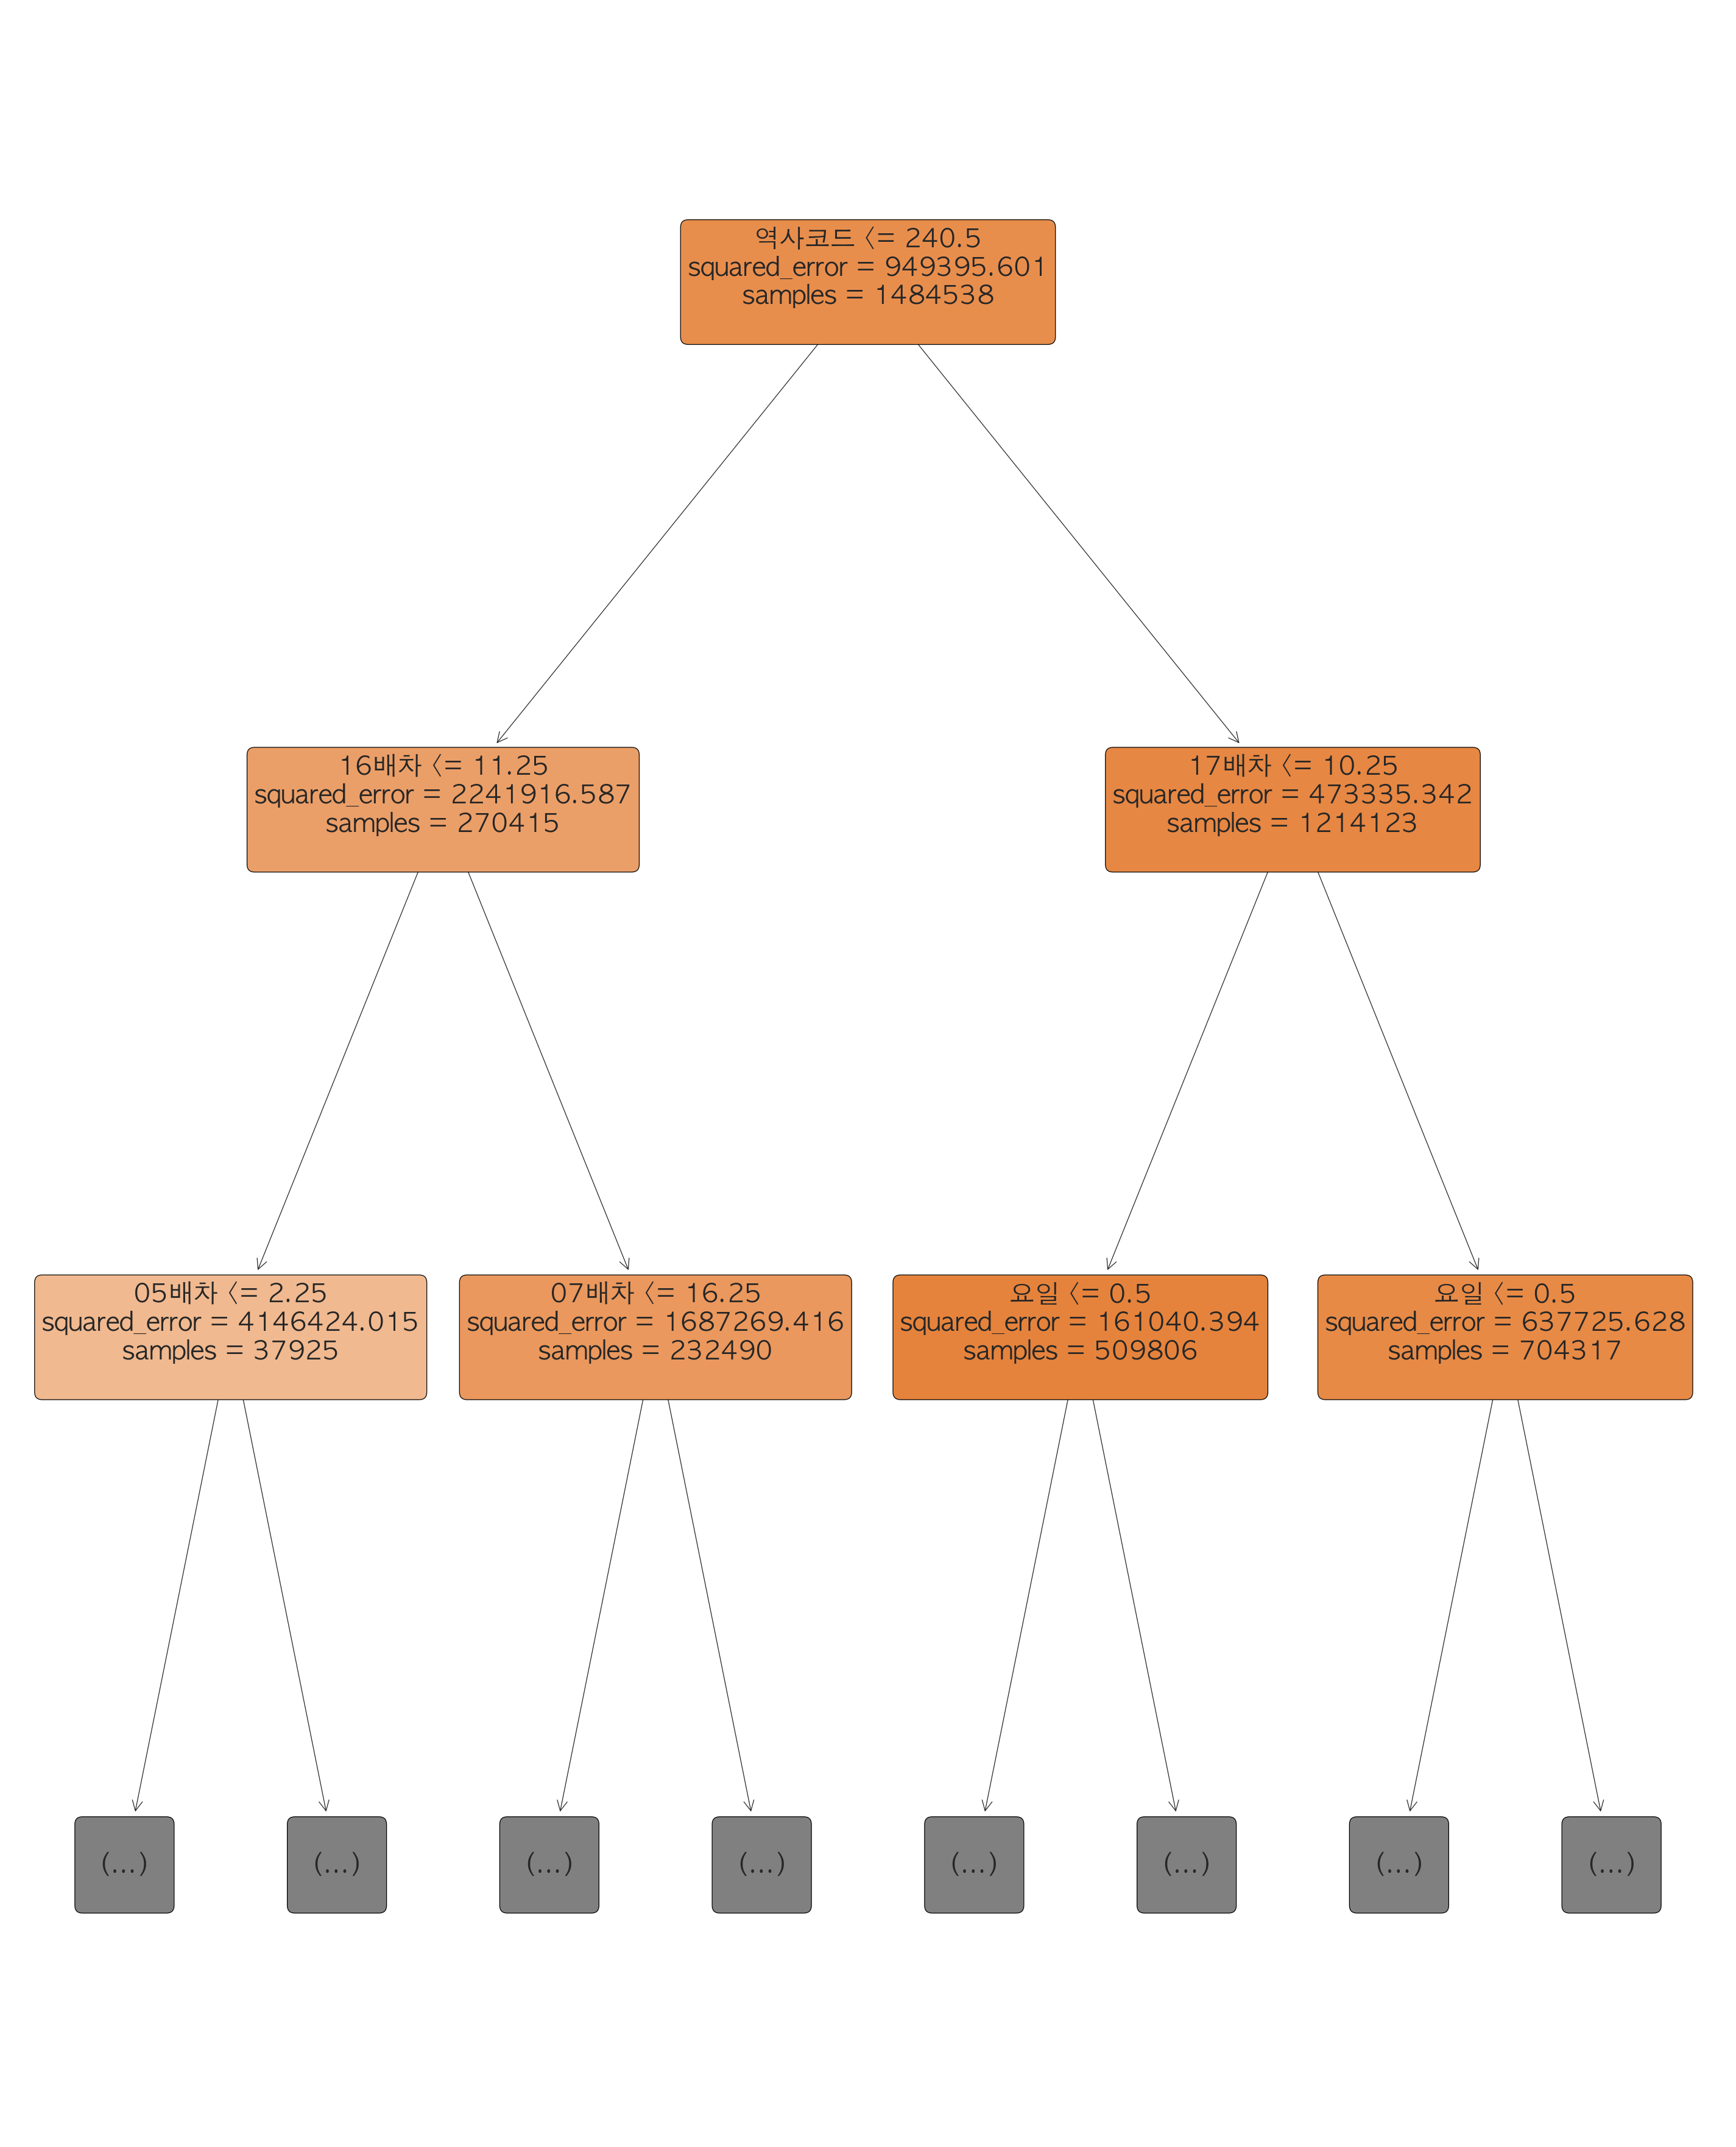

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,15),dpi=300)
ax = plt.gca()
tree_plot=plot_tree(reg,max_depth=2, feature_names=list(X.columns),filled=True,rounded=True, fontsize=10,ax=ax)
# value 텍스트를 제거
# 'value' 텍스트를 제거
for text in ax.get_children():
    if isinstance(text, plt.Text):
        if 'value' in text.get_text():
            new_text = text.get_text().split('value')[0]
            text.set_text(new_text)
# plt.savefig("../Data/tree.jpg")
plt.show()

---
### 지니 불순도는 나오지 않음... 
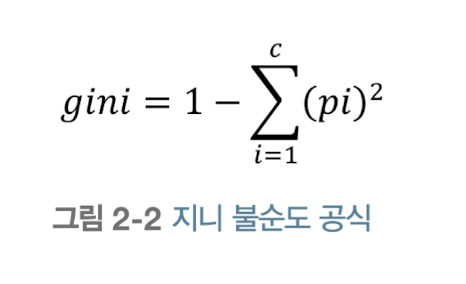

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

reg = DecisionTreeRegressor(random_state=2)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_train)
# accuracy_score(y_pred,y_test)
# 성능 평가
mse = mean_squared_error(y_train, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)
# print(Service.colored_text(f'score : {scores}','red'))
# print("R2 score: ",r2.mean())
print("RMSE  평균:",rmse.mean())

RMSE  평균: 0.0


In [22]:
leaf_node_count = 0
tree = reg.tree_
for i in range(tree.node_count):
    if (tree.children_left[i] == -1 ) and (tree.children_right[i]==-1):
        leaf_node_count+= 1
        if tree.n_node_samples[i] >1:
            print('노드인덱스',i,'샘플개수:',tree.n_node_samples[i])
print('전체 리프 노드 개수: ', leaf_node_count)

노드인덱스 12 샘플개수: 3
노드인덱스 14 샘플개수: 2
노드인덱스 17 샘플개수: 2
노드인덱스 21 샘플개수: 3
노드인덱스 23 샘플개수: 3
노드인덱스 24 샘플개수: 2
노드인덱스 28 샘플개수: 3
노드인덱스 32 샘플개수: 2
노드인덱스 33 샘플개수: 3
노드인덱스 35 샘플개수: 2
노드인덱스 36 샘플개수: 3
노드인덱스 38 샘플개수: 3
노드인덱스 41 샘플개수: 2
노드인덱스 43 샘플개수: 2
노드인덱스 46 샘플개수: 3
노드인덱스 53 샘플개수: 2
노드인덱스 55 샘플개수: 2
노드인덱스 56 샘플개수: 2
노드인덱스 57 샘플개수: 3
노드인덱스 61 샘플개수: 2
노드인덱스 62 샘플개수: 2
노드인덱스 64 샘플개수: 3
노드인덱스 68 샘플개수: 2
노드인덱스 71 샘플개수: 3
노드인덱스 72 샘플개수: 2
노드인덱스 75 샘플개수: 2
노드인덱스 76 샘플개수: 3
노드인덱스 78 샘플개수: 3
노드인덱스 79 샘플개수: 2
노드인덱스 84 샘플개수: 3
노드인덱스 85 샘플개수: 3
노드인덱스 86 샘플개수: 2
노드인덱스 89 샘플개수: 3
노드인덱스 90 샘플개수: 3
노드인덱스 91 샘플개수: 2
노드인덱스 94 샘플개수: 3
노드인덱스 99 샘플개수: 2
노드인덱스 100 샘플개수: 3
노드인덱스 101 샘플개수: 3
노드인덱스 105 샘플개수: 2
노드인덱스 106 샘플개수: 2
노드인덱스 107 샘플개수: 3
노드인덱스 108 샘플개수: 2
노드인덱스 110 샘플개수: 2
노드인덱스 114 샘플개수: 3
노드인덱스 117 샘플개수: 2
노드인덱스 118 샘플개수: 3
노드인덱스 121 샘플개수: 3
노드인덱스 122 샘플개수: 3
노드인덱스 124 샘플개수: 2
노드인덱스 125 샘플개수: 2
노드인덱스 129 샘플개수: 3
노드인덱스 131 샘플개수: 3
노드인덱스 132 샘플개수: 3
노드인덱스 134 샘플개수: 3
노드인덱스 136 샘플개수: 3
노드인덱스 137 샘플개수: 3
노드인덱스 139 샘

In [32]:
leaf_node_count/len(X_train) 

0.40441175096389076

In [33]:
def grid_search(params, reg = DecisionTreeRegressor(random_state=2)):
    from sklearn.model_selection import GridSearchCV
    # params = {'max_depth':[None,2,3,4,6,8,10,20]}
    reg = DecisionTreeRegressor(random_state=2)
    grid_reg = GridSearchCV(reg,params, scoring='neg_mean_squared_error',
                            cv=5,
                            return_train_score=True,
                            n_jobs=-1
                            )
    
    grid_reg.fit(X_train,y_train)
    best_model = grid_reg.best_estimator_
    
    best_params= grid_reg.best_params_
    print("최상의 매개변수: ",best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print(f"훈련점수 : {best_score:.3f}")
    y_pred =best_model.predict(X_test)
    rmse_test = mean_squared_error(y_test,y_pred)**0.5
    print(f'테스트 점수: {rmse_test:.3f} (rmse)')

In [34]:
params = {'max_depth':[None,216389//32,216389//16,216389//8,216389//4,216389//2]}
grid_search(params, reg = DecisionTreeRegressor(random_state=2))

최상의 매개변수:  {'max_depth': None}
훈련점수 : 77.095
테스트 점수: 53.521 (rmse)


In [25]:
X_train.shape


(535071, 27)

In [26]:
grid_search(params= {'min_samples_leaf': [1,2,4,6,8,10,20,30]})

최상의 매개변수:  {'max_depth': None}
훈련점수 : 77.095
테스트 점수: 53.521


In [29]:
grid_search(params= {
    'min_samples_leaf': [1,2,4,6,8,10,20,30],\
    'max_depth':[None,2,3,4,6,8,10,20,40,80,160]})


최상의 매개변수:  {'max_depth': None}
훈련점수 : 77.095
테스트 점수: 53.521


---
### RandomizedSearchCV

 탐색할 파라미터를 확장하기 위해 사용
 

In [52]:


def randomized_search_reg(params,runs=20, reg = DecisionTreeRegressor(random_state=2)):
    from sklearn.model_selection import RandomizedSearchCV
    # from sklearn.model_selection import GridSearchCV
    # params = {'max_depth':[None,2,3,4,6,8,10,20]}
    # reg = DecisionTreeRegressor(random_state=2)
    rand_reg = RandomizedSearchCV(
        reg,
        params,
        n_iter=runs,
        scoring='neg_mean_squared_error',
        cv=5,
        return_train_score=True,
        n_jobs=-1,
        error_score='raise'  # 에러가 발생하면 예외를 발생시키도록 설정
        )
    rand_reg.fit(X_train,y_train)
    best_model = rand_reg.best_estimator_
    best_params= rand_reg.best_params_
    print("최상의 매개변수: ",*best_params)
    best_score = np.sqrt(-rand_reg.best_score_)
    print(f"훈련점수 : {best_score:.3f}")
    y_pred =best_model.predict(X_test)
    rmse_test = mean_squared_error(y_test,y_pred)**0.5
    print(f'테스트 점수: {rmse_test:.3f} (rmse)')
    return best_model

randomized_search_reg(
    reg=XGBRegressor(random_state=2),
    params={
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [3, 4, 5, 6, 8, 10],
        'min_child_weight': [1, 3, 5, 7],
        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0.0, 0.1, 0.5, 1.0],
        'reg_lambda': [0.0, 0.1, 0.5, 1.0],
        'scale_pos_weight': [1, 2, 3, 4]
    }
)


KeyboardInterrupt: 

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
randomized_search_reg(
    reg = DecisionTreeRegressor(random_state= 2),
    params={
        'splitter':['random', 'best'],
        'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04], 
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None], 
        'max_features':[1, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        'max_depth':[None, 2,4,6,8],
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
    }
)


최상의 매개변수:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 5, 'min_samples_leaf': 0.02, 'min_impurity_decrease': 0.005, 'max_leaf_nodes': None, 'max_features': 0.85, 'max_depth': 8}
훈련점수 : 812.845
테스트 점수: 810.096 (rmse)


DecisionTreeRegressor(max_depth=8, max_features=0.85,
                      min_impurity_decrease=0.005, min_samples_leaf=0.02,
                      min_samples_split=5, random_state=2)

In [50]:
randomized_search_reg(
    reg = RandomForestRegressor(random_state= 2),
    params={
        'splitter':['random', 'best'],
        'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04], 
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None], 
        'max_features':[1, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        'max_depth':[None, 2,4,6,8],
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
    })

최상의 매개변수:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.005, 'min_samples_split': 8, 'min_samples_leaf': 0.01, 'min_impurity_decrease': 0.0005, 'max_leaf_nodes': 30, 'max_features': 0.7, 'max_depth': None}
훈련점수 : 777.825
테스트 점수: 777.629 (rmse)


DecisionTreeRegressor(max_features=0.7, max_leaf_nodes=30,
                      min_impurity_decrease=0.0005, min_samples_leaf=0.01,
                      min_samples_split=8, min_weight_fraction_leaf=0.005,
                      random_state=2)

---
### 특성중요도 파악 

In [ ]:
feature_dict =dict(zip(X.columns, best_model.feature_importances_)
import operator